<a href="https://colab.research.google.com/github/Another-movie/BookMark/blob/master/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

# Intro to Pandas

датафрейм и таблицы в базах данных это одно и то же, единственное отличие наличие функций датафрейма (методы) упрощающие работату над ними, и дающее полный контроль над происходящим в них.
Сперва ознакомимся с функциями ознакомления с датафреймом. Прежде чем как 

In [0]:
df = pd.read_csv('/content/stds.csv')

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
df.loc[[0]]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495


In [0]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [0]:
df.shape

(1000, 8)

In [0]:
df.iloc[:5, :2]

,gender,race/ethnicity
0,female,group B
1,female,group C
2,female,group B
3,male,group A
4,male,group C


In [0]:
df.iloc[[0,3,10],[0,6,-1]]

,gender,reading score,writing score
0,female,72,74
3,male,57,44
10,male,54,52


In [0]:
df_names = df.iloc[[0,3,-1]]


In [0]:
df_names.index = ["Madiyar", "Tima", "Abu"]

In [0]:
df_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Madiyar,female,group B,bachelor's degree,standard,none,72,72,74
Tima,male,group A,associate's degree,free/reduced,none,47,57,44
Abu,female,group D,some college,free/reduced,none,77,86,86


In [0]:
df_names.loc[['Abu', "Tima"]] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Abu,female,group D,some college,free/reduced,none,77,86,86
Tima,male,group A,associate's degree,free/reduced,none,47,57,44


In [0]:
df_names.iloc[:,0]

Madiyar    female
Tima         male
Abu        female
Name: gender, dtype: object

In [0]:
df.iloc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [0]:
df.get_dtype_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


int64     3
object    5
dtype: int64

In [0]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# Data Filter

In [0]:
df.loc[(df['writing score']>68) & (df.gender == 'male')].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4,male,group C,some college,standard,none,76,78,75
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
25,male,group A,master's degree,free/reduced,none,73,74,72


In [0]:
len(df.loc[df.lunch=='free/reduced'])/len(df)

0.355

In [0]:
male = df.loc[df.gender == 'male', ['gender', 'lunch']]
male

,gender,lunch
3,male,free/reduced
4,male,standard
7,male,free/reduced
8,male,free/reduced
10,male,standard
...,...,...
985,male,standard
987,male,standard
990,male,free/reduced
994,male,standard


In [0]:
set(df.lunch)

{'free/reduced', 'standard'}

In [0]:
df.lunch.describe()

count         1000
unique           2
top       standard
freq           645
Name: lunch, dtype: object

In [0]:
df.loc[df.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [0]:
df.loc[df.lunch=='free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [0]:
for i in df['lunch'].unique():
    print('Дисперсия для группы с ',i,' ланчем равна: ', round(df[df['lunch']==i][['math score','reading score','writing score']].values.std()**2,2),' , а среднее: ', round(df[df['lunch']==i][['math score','reading score','writing score']].values.mean(),2))
    print(df[df['lunch']==i].describe())

Дисперсия для группы с  standard  ланчем равна:  194.58  , а среднее:  70.84
       math score  reading score  writing score
count  645.000000     645.000000     645.000000
mean    70.034109      71.654264      70.823256
std     13.653501      13.830602      14.339487
min     19.000000      26.000000      22.000000
25%     61.000000      63.000000      62.000000
50%     69.000000      72.000000      72.000000
75%     80.000000      82.000000      81.000000
max    100.000000     100.000000     100.000000
Дисперсия для группы с  free/reduced  ланчем равна:  235.13  , а среднее:  62.2
       math score  reading score  writing score
count  355.000000     355.000000     355.000000
mean    58.921127      64.653521      63.022535
std     15.159956      14.895339      15.433823
min      0.000000      17.000000      10.000000
25%     49.000000      56.000000      53.000000
50%     60.000000      65.000000      64.000000
75%     69.000000      75.000000      74.000000
max    100.000000     100.0

In [0]:
df.columns = [x.replace(" ", "_") for x in df.columns]

In [0]:
df.query('writing_score > 21')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [0]:
df.columns = [x.replace(' ','_') for x in df.columns]

In [0]:
df.query('writing_score > 70 | lunch == "standard"')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [0]:
df[df['parental_level_of_education'].isin(["bachelor's degree", "master's degree"])]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


In [0]:
df.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# Group by and aggregate

In [0]:
means = df.groupby(['gender', "lunch"], as_index=False).aggregate({"math_score":"mean", "reading_score":"mean"})

In [0]:
means.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [0]:
means.loc[(means['gender']=="male") & (means['lunch']=='standard')]

,gender,lunch,math_score,reading_score
3,male,standard,72.022152,67.537975


In [0]:
df.sort_values(['gender', 'math_score'], ascending=False).groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


# Adding new column
 Assume that Pandas dataframe like dictionary we can do smth like dict['asdas'] = asd

In [0]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score

In [0]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [0]:
df.query('total_score > 200')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
...,...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76,207
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208
995,female,group E,master's degree,standard,completed,88,99,95,282
998,female,group D,some college,standard,completed,68,78,77,223


In [0]:
df = df.assign(total_score_log=np.log(df.total_score))

In [0]:
df.drop(['gender'], axis=1)

,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,group C,some college,standard,completed,69,90,88,247,5.509388
2,group B,master's degree,standard,none,90,95,93,278,5.627621
3,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,group D,some college,standard,completed,68,78,77,223,5.407172


# Data Vizualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

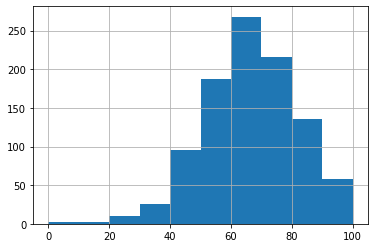

In [0]:
df.math_score.hist()

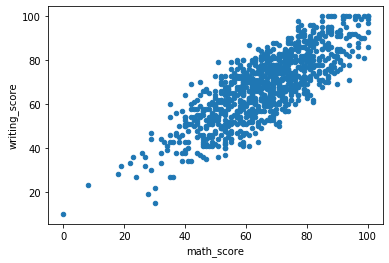

In [0]:
df.plot.scatter(x='math_score', y="writing_score")

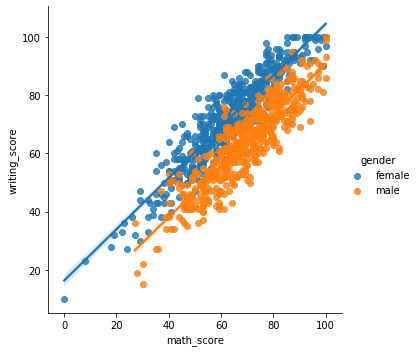

In [0]:
sns.lmplot(x='math_score',y='writing_score', hue='gender', data=df)

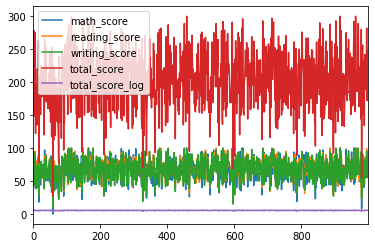

In [0]:
df.plot()

In [0]:
stepik = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

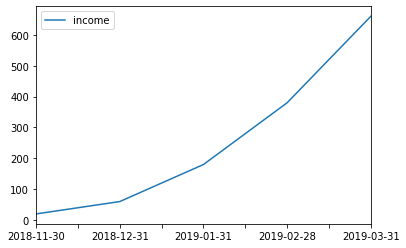

In [0]:
stepik.plot()

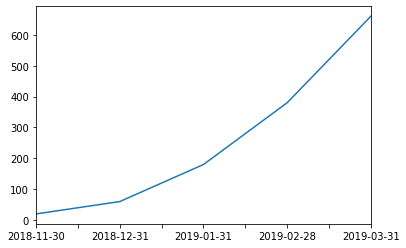

In [0]:
stepik.income.plot()

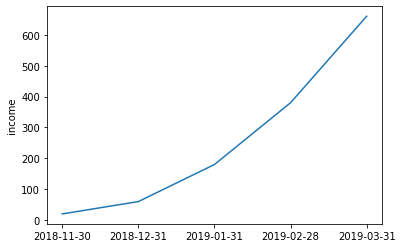

In [0]:
sns.lineplot(x=stepik.index, y=stepik.income)

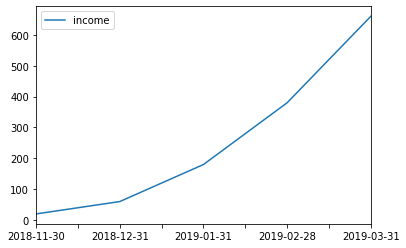

In [0]:
stepik.plot(kind='line')

In [0]:
sns.lmplot(x='x', y='y', data=text)

NameError: ignored

In [0]:
dota2_df=pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota2_df.head()

In [0]:
dota2_df.roles.hist()

In [0]:
dota2_df['cnt']=dota2_df.roles.str.count(',')+1

In [0]:
dota2_df.head()

In [0]:
dota2_df.cnt.hist()

In [0]:
flowers = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [0]:
for i in flowers:
    sns.distplot(flowers[i])

In [0]:
flowers.head()

In [0]:
flowers = flowers.drop(['Unnamed: 0'], axis=1)

In [0]:
sns.distplot(flowers['sepal length'])

In [0]:
sns.distplot(flowers['sepal width'])

In [0]:
sns.distplot(flowers['petal length'])

In [0]:
sns.distplot(flowers['petal width'])

In [0]:
sns.pairplot(flowers)

In [0]:
subset_1 = flowers[['petal width', 'petal length']][:10]

In [0]:
subset_1

In [0]:
flowers.loc[flowers.index != 1]

In [0]:
flowers.columns

In [0]:
pop = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')


In [0]:
n_u = pop['n_users']
n_u = n_u.loc[n_u>0]
app = n_u.median()

In [0]:
n_uw

In [0]:
pop[pop.n_users >= 0.0].n_users.median()

In [0]:
aaa = pop.groupby('group',as_index=False).agg({"session_value":"mean"})
aaa

Linear Regression

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


In [0]:
df['gender'].replace({'male':1, 'female': 0}, inplace=True)

In [0]:
df['lunch'].replace({'standard':1, 'free/reduced': 0}, inplace=True)

In [54]:
set(df['race/ethnicity'])

{'group A', 'group B', 'group C', 'group D', 'group E'}

In [53]:
df.corr()

,gender,lunch,math score,reading score,writing score
gender,1.000000,0.021372,0.167982,-0.244313,-0.301225
lunch,0.021372,1.000000,0.350877,0.229560,0.245769
math score,0.167982,0.350877,1.000000,0.817580,0.802642
reading score,-0.244313,0.229560,0.817580,1.000000,0.954598
writing score,-0.301225,0.245769,0.802642,0.954598,1.000000


In [48]:
df[['math score', 'reading score']]

,math score,reading score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78
...,...,...
995,88,99
996,62,55
997,59,71
998,68,78


In [0]:
new_df = pd.read_csv('/content/dogs_n_cats.csv')

In [64]:
new_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [0]:
index = ['length', 'height', 'wolly', 'barks','climbing trees','type']
new_df.columns = index

In [0]:
lit = LinearRegression()

In [20]:
new_df.head()

,length,height,wolly,barks,climbing trees,type
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [0]:
new_df['type'].replace({'собачка':1,"котик":2}, inplace=True)

In [23]:
new_df['type']

0      1
1      1
2      1
3      1
4      1
      ..
995    2
996    2
997    2
998    2
999    2
Name: type, Length: 1000, dtype: int64

In [0]:
X = new_df[index[:-1]]
y = new_df["type"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
lit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lit.predict(X_test)

array([[1.99661996],
       [1.73080595],
       [2.05766683],
       [2.03731787],
       [1.06565666],
       [2.05766683],
       [2.07801579],
       [1.98151278],
       [1.92046591],
       [0.90670316],
       [2.01696892],
       [0.95005411],
       [2.03731787],
       [1.91522413],
       [2.01696892],
       [2.03731787],
       [0.97895475],
       [2.01696892],
       [1.95592204],
       [1.12345793],
       [1.91522413],
       [0.8633522 ],
       [1.1746101 ],
       [1.99661996],
       [0.99340507],
       [1.12345793],
       [0.99340507],
       [2.03731787],
       [2.05766683],
       [2.05766683],
       [1.0945573 ],
       [1.0223057 ],
       [1.93557309],
       [0.97895475],
       [1.08790819],
       [0.87780252],
       [1.91522413],
       [1.976271  ],
       [2.05766683],
       [0.92115348],
       [1.03010692],
       [0.96450443],
       [1.10900761],
       [2.07801579],
       [0.92115348],
       [1.0945573 ],
       [1.73080595],
       [1.996

In [27]:
lit.score(X_train, y_train)

0.9628972456380654

In [28]:
lit.score(X_test, y_test)

0.967783698917999